In [5]:
#データ処理のライブラリ
import numpy as np
import pandas as pd

#データ可視化のライブラリ
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#機械学習ライブラリ　scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

In [6]:
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\fx757887\scikit_learn_data


In [7]:
#MNISTデータの読み込み
#mnist=fetch_mldata("MNIST original")
mnist = fetch_openml('mnist_784', version=1,)

In [8]:
y=mnist["target"]

In [9]:
x=mnist["data"]

In [10]:
#サイズ確認
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [11]:
#サンプルの抽出
test_number=x[32443]
test_number_image=test_number.reshape(28,28)
print(test_number.shape)
print(test_number_image.shape)

(784,)
(28, 28)


In [12]:
#Numpy配列
test_number_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
# Numpy配列からPandasデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)

# 最大表示カラム数を設定
pd.options.display.max_columns = 28

# データフレームを表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,136.0,136.0,164.0,254.0,255.0,254.0,254.0,185.0,136.0,51.0,12.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,86.0,249.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,221.0,52.0,3.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,179.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,232.0,14.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,207.0,253.0,253.0,253.0,253.0,253.0,237.0,182.0,182.0,129.0,180.0,224.0,220.0,253.0,253.0,65.0,0.0,0.0,0.0


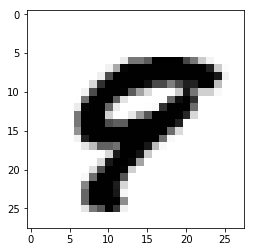

In [14]:
#Numpyから画像を表示
plt.imshow(test_number_image, cmap=matplotlib.cm.binary)
plt.show()

In [15]:
print(y[32343])

5


In [16]:
#訓練、テストセットに分割
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

#サイズ確認
print(x_train.shape)
print(x_test.shape)

(56000, 784)
(14000, 784)


In [17]:
#x_train=x_train.astype("int32")/255
#y_train=y_train.astype("int32")/255

In [18]:
#データ整形
#_train=x_train.reshape(x_train.shape[0],28,28,1)
#_test=x_test.reshape(x_test.shape[0],28,28,1)
#rint(x_train.shape)
#rint(x_test.shape)

In [19]:
#4.3

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
#ロジスティック回帰　インスタンス生成
logi_model=LogisticRegression(random_state=42)

In [22]:
#モデル訓練
#Make Model    
logi_model.fit(x_train,y_train)

C:\Users\fx757887\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                   intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,
                   penalty='12',random_state=42,solver='liblinear',tol=0.0001,
                   verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
#テストデータから推測
logi_pred=logi_model.predict(x_test)

#混同行列
print(confusion_matrix(y_test,logi_pred))

[[1289    1    6    0    5   14   12    6    8    2]
 [   0 1557    5    9    2    7    0    3   15    2]
 [   4   20 1229   25   16    8   19   15   35    9]
 [   6    7   30 1298    1   38    4   14   19   16]
 [   4    0    8    5 1194    4   13    6   12   49]
 [   7   11    8   53   16 1087   20    2   54   15]
 [   7    3   20    0   14   14 1332    2    4    0]
 [   5    4   28    4    8    5    0 1408    2   39]
 [  11   24   17   38    7   39   12   10 1186   13]
 [   7   10    7   14   40    5    0   45   22 1270]]
